In [81]:
#imorting neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [82]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    print("Running in google colab\n")
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')

else:
    print("Running in local system")
    file_path = r"/Users/ls/Desktop/Stackoverflow-Analysis/Data/survey_results_sample_2018.csv"  # Replace with your file path
    df=pd.read_csv(file_path)

Running in local system


In [83]:
# Display the first few rows of the dataframe
print(df.head())


   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
1  Employed full-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time         Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology,

In [84]:
# Summary statistics
print(df.describe())

       Respondent  AssessJob1  AssessJob2  AssessJob3  AssessJob4  AssessJob5  \
count   99.000000   64.000000   64.000000   64.000000   64.000000   64.000000   
mean    74.252525    5.750000    6.437500    6.312500    4.359375    3.218750   
std     42.168598    2.817181    2.695528    2.641999    2.674792    2.458989   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     40.000000    4.000000    4.750000    4.000000    2.000000    1.000000   
50%     77.000000    6.000000    7.000000    7.000000    4.000000    2.000000   
75%    111.500000    8.000000    9.000000    8.000000    6.000000    4.000000   
max    143.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

       AssessJob6  AssessJob7  AssessJob8  AssessJob9  ...  \
count    64.00000   64.000000   64.000000   64.000000  ...   
mean      5.03125    5.500000    4.343750    7.781250  ...   
std       2.41009    2.949307    2.533701    2.446045  ...   
min       1.00000    1

In [85]:
# Check for missing values
print(df.isnull().sum())

Respondent        0
Hobby             0
OpenSource        0
Country           0
Student           1
                 ..
Age              32
Dependents       32
MilitaryUS       80
SurveyTooLong    32
SurveyEasy       32
Length: 129, dtype: int64


/var/folders/9p/34kjp0md5tv5sz77mfqf7y440000gn/T/ipykernel_51256/2208408659.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='JobSatisfaction', data=df, palette='viridis')


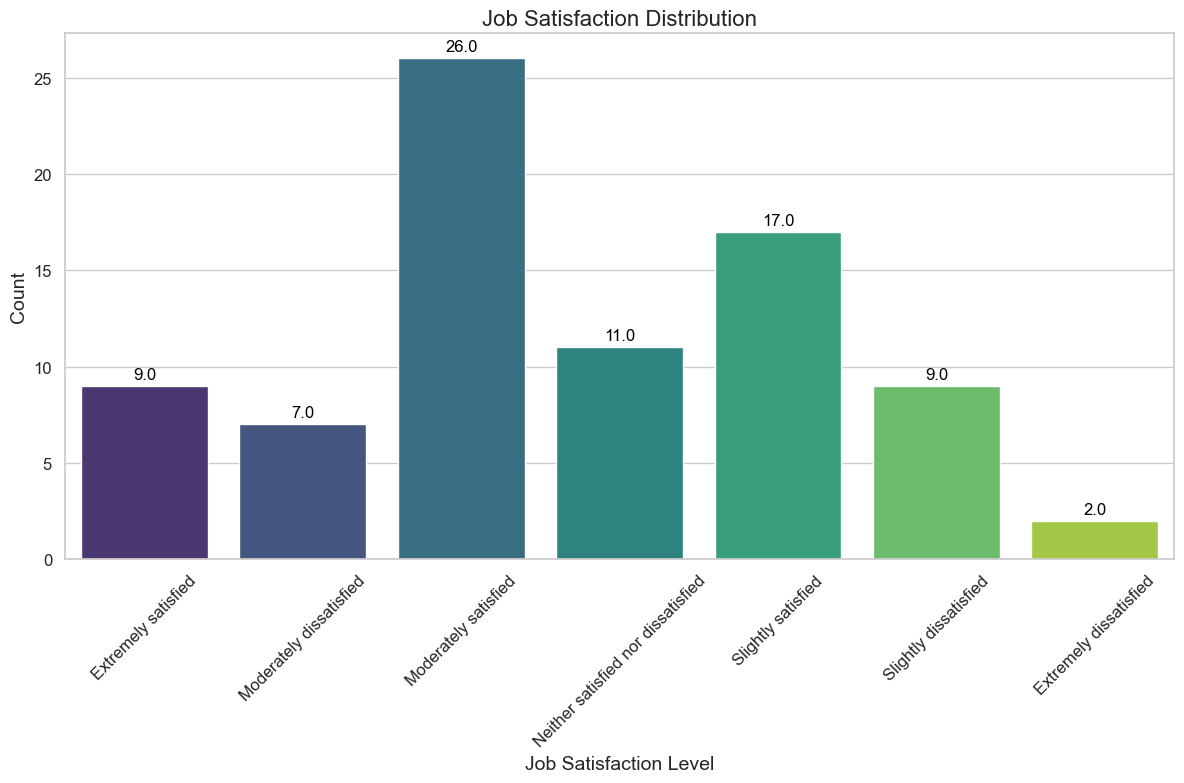

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the count plot
ax = sns.countplot(x='JobSatisfaction', data=df, palette='viridis')

# Add title and labels
plt.title('Job Satisfaction Distribution', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [87]:
# Select relevant features for prediction , which are relatade to job
features = ['Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation',
            'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf',
            'JobSatisfaction']

In [88]:
# Filter the dataset with selected features
df = df[features]

In [89]:
# Drop rows with missing target value
df = df.dropna(subset=['JobSatisfaction'])

In [90]:
oe = OrdinalEncoder(categories=[['Extremely dissatisfied','Moderately dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied', 'Slightly satisfied', 'Moderately satisfied', 'Extremely satisfied']])
df['JobSatisfaction'] = oe.fit_transform(df[['JobSatisfaction']])

In [91]:
df.head()

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction
0,Yes,No,Kenya,No,Employed part-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,6.0
1,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,1.0
2,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,5.0
3,No,No,United States,No,Employed full-time,"Bachelor‚Äôs degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,12-14 years,3.0
4,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,4.0


/var/folders/9p/34kjp0md5tv5sz77mfqf7y440000gn/T/ipykernel_51256/2208408659.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='JobSatisfaction', data=df, palette='viridis')


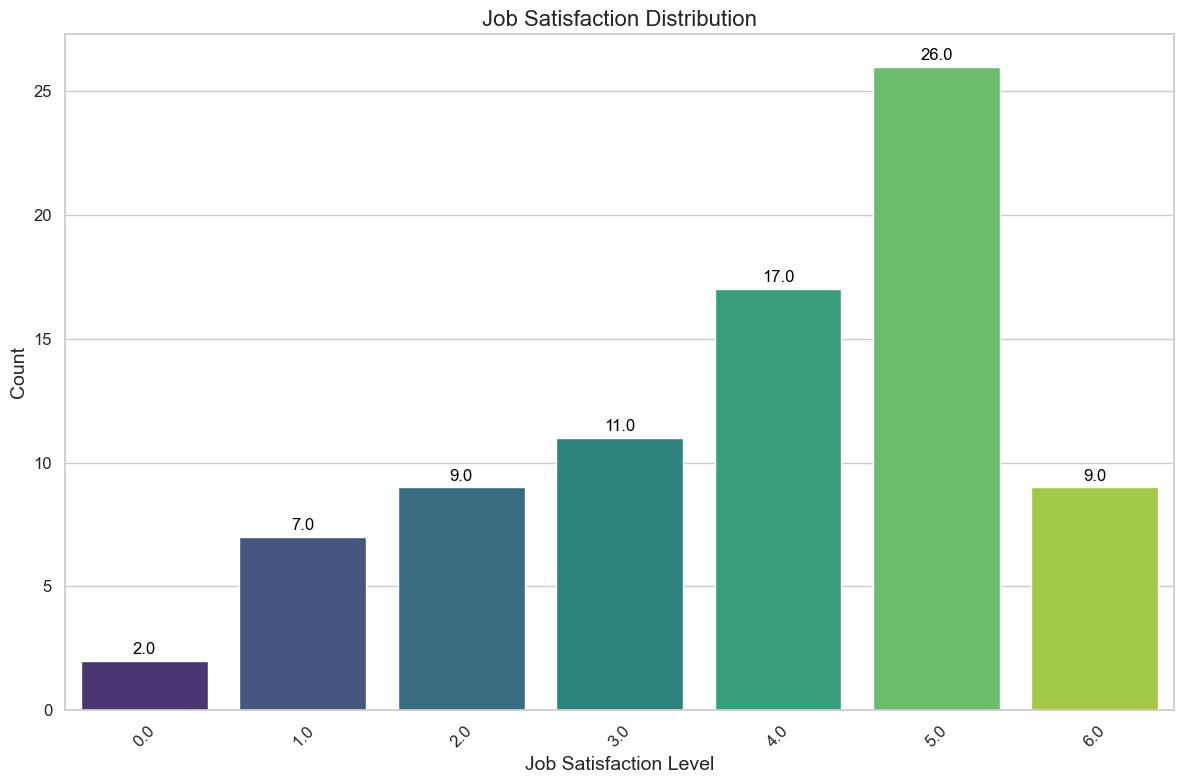

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the count plot
ax = sns.countplot(x='JobSatisfaction', data=df, palette='viridis')

# Add title and labels
plt.title('Job Satisfaction Distribution', fontsize=16)
plt.xlabel('Job Satisfaction Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [93]:
# Split features and target
X = df.drop('JobSatisfaction', axis=1)
y = df['JobSatisfaction']

In [94]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [95]:
# Preprocessing pipelines for numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [96]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [97]:
# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Create and fit the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [100]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       'YearsCoding', 'YearsCodingProf'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [101]:
# Make predictions
y_pred = model.predict(X_test)

In [102]:
import joblib

In [103]:
# Save the model to a file
joblib.dump(model, 'model.pkl')

['model.pkl']

Accuracy: 0.18
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         1
         5.0       0.27      1.00      0.43         3
         6.0       0.00      0.00      0.00         5

    accuracy                           0.18        17
   macro avg       0.05      0.17      0.07        17
weighted avg       0.05      0.18      0.08        17



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

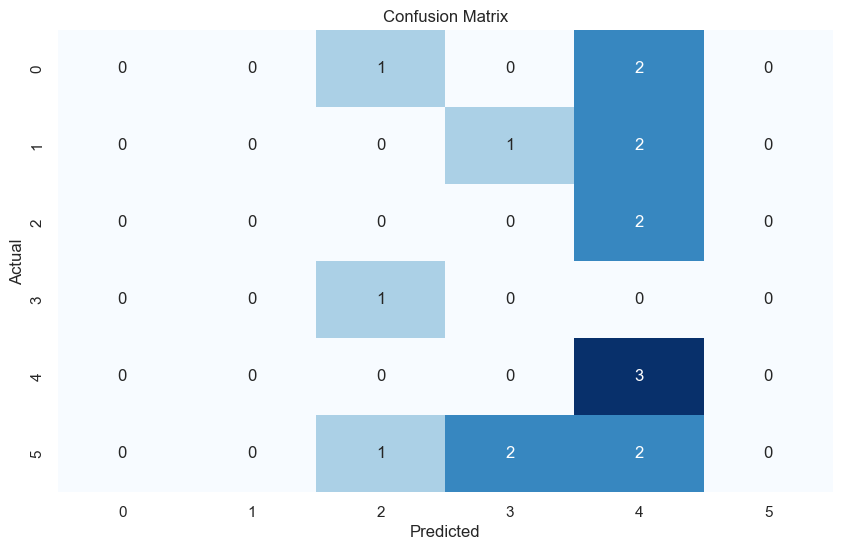

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
#Adding more libraries required
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc



# Printing accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Printing classification report
print('Classification Report:')
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Converting classification report to a DataFrame for better readability
report_df = pd.DataFrame(report).transpose()

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# If the model is a binary classifier, plot the ROC curve
if len(set(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [105]:
#Testing the Model
def predict_job_satisfaction(user_input):
    # Convert user input to DataFrame
    input_df = pd.DataFrame([user_input])

    # Ensure the input has the same columns as the training data
    input_df = input_df[X.columns]

    # Make prediction
    prediction = model.predict(input_df)

    return prediction[0]

In [106]:
# Example user input
user_input_example = {
    'Hobby': 'Yes',
    'OpenSource': 'Yes',
    'Country': 'United States',
    'Student': 'No',
    'Employment': 'Employed full-time',
    'FormalEducation': 'Bachelor’s degree (BA, BS, B.Eng., etc.)',
    'UndergradMajor': 'Computer science, computer engineering, or software engineering',
    'CompanySize': '100 to 499 employees',
    'DevType': 'Developer, back-end',
    'YearsCoding': '6-8 years',
    'YearsCodingProf': '3-5 years'
}

In [110]:
# Predict job satisfaction for the example input
predicted_satisfaction = predict_job_satisfaction(user_input_example)
print(f'Predicted Job Satisfaction: {oe.inverse_transform([[predicted_satisfaction]])}')

Predicted Job Satisfaction: [['Moderately satisfied']]
